Introduction

=>This project focuses on predicting house prices using machine learning regression models.
The dataset consists of 545 house records with features such as area, bedrooms, bathrooms, stories, parking, and amenities like mainroad, guestroom, basement, hot water heating, air conditioning, preferred area, and furnishing status.

=>The goal is to build models that can accurately predict the price of a house based on these features. This helps buyers, sellers, and real estate analysts make informed decisions.

**Problem Statement**

=>House prices depend on multiple numeric and categorical features. =>The challenge is to accurately predict price using regression models that handle linear and non-linear relationships

**Objective**

=>Preprocess and encode the dataset for machine learning.

=>Split the data into training and testing sets.

=>Train multiple regression models:

-Linear Regression

-Multiple Linear Regression

-Polynomial Regression (degree 2)

-K-Nearest Neighbors Regression

-Decision Tree Regression

=>Evaluate model performance using MAE, MSE, RMSE, and R².

=>Select the best model for house price prediction.

=>Visualize the relationship between actual and predicted prices.

 **Import Libraries**


 libraries support data processing, modeling, and evaluation.

In [2]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


Loads housing dataset into Colab memory.

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Housing Price.csv to Housing Price.csv


Visualize sample data

In [5]:
df = pd.read_csv('Housing Price.csv')
df.head(), df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 (545, 13),
 None)

**One Hot Encoding**

-Converts nominal categorical features into binary columns.
sothat,Binary features with "yes/no" values are converted into numeric 1/0 format., handling missing data, and separating features and target variables for regression modeling

In [7]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

if 'furnishingstatus' in df.columns:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

df = df.fillna(0)


for col in df.columns:
    if col != 'price':
        df[col] = df[col].astype(int)

X = df.drop('price', axis=1)
y = df['price']

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [9]:

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


**Train-Test Split (Unseen Data)**

In [34]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training data:", X_train.shape)
print("Testing data (unseen):", X_test.shape)


Training data: (436, 13)
Testing data (unseen): (109, 13)


**Feature Scalling **

In [11]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Regression Models

In [12]:

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2  :", r2_score(y_test, y_pred))


Linear Regression and Evaluation matrix



using


.MAE

.MSE

.RMSE

.R2 score

In [13]:

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("Linear Regression")
evaluate(lr, X_test_scaled, y_test)


Linear Regression
MAE : 970043.4039201642
MSE : 1754318687330.668
RMSE: 1324506.9600914402
R2  : 0.6529242642153176


Mltiple Linear Regression and Evaluation matrix



using

.MAE

.MSE

.RMSE

.R2 score

In [14]:

mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

print("Multiple Linear Regression")
evaluate(mlr, X_test_scaled, y_test)


Multiple Linear Regression
MAE : 970043.4039201642
MSE : 1754318687330.668
RMSE: 1324506.9600914402
R2  : 0.6529242642153176


Polynomial  Regression and Evaluation matrix


using

.MAE

.MSE

.RMSE

.R2 score

In [15]:

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

print("Polynomial Regression")
evaluate(poly_model, X_test_poly, y_test)


Polynomial Regression
MAE : 1034749.2706758836
MSE : 1901686413946.4478
RMSE: 1379016.4661621875
R2  : 0.6237689217365157


KNN Regression and Evaluation matrix


using

.MAE

.MSE

.RMSE

.R2 score

In [16]:

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("KNN Regression")
evaluate(knn, X_test_scaled, y_test)


KNN Regression
MAE : 999594.6055045872
MSE : 1953996997258.202
RMSE: 1397854.4263471079
R2  : 0.6134197563748457


Decision Tree Regression and Evaluation matrix


using

.MAE

.MSE

.RMSE

.R2 score

In [17]:

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

print("Decision Tree Regression")
evaluate(dt, X_test, y_test)


Decision Tree Regression
MAE : 1195266.0550458715
MSE : 2642802637614.6787
RMSE: 1625669.904259373
R2  : 0.4771459275854347


Testing with Completely Unseen Data(new Data)

In [32]:

new_house = pd.DataFrame(
    data=np.zeros((1, X.shape[1])),
    columns=X.columns
)


new_house['area'] = 2000
new_house['bedrooms'] = 3
new_house['bathrooms'] = 2
new_house['stories'] = 1


new_house['mainroad'] = 1
new_house['guestroom'] = 0
new_house['basement'] = 0
new_house['airconditioning'] = 1
new_house['prefarea'] = 0


new_house['furnishingstatus_semi-furnished'] = 0
new_house['furnishingstatus_unfurnished'] = 1

new_house_scaled = scaler.transform(new_house)

In [33]:
print("Linear:", int(lr.predict(new_house_scaled)[0]))
print("Multiple Linear:", int(mlr.predict(new_house_scaled)[0]))
print("Polynomial:", int(poly_model.predict(poly.transform(new_house_scaled))[0]))
print("KNN:", int(knn.predict(new_house_scaled)[0]))
print("Decision Tree:", int(dt.predict(new_house)[0]))

Linear: 4304373
Multiple Linear: 4304373
Polynomial: 3792623
KNN: 3222800
Decision Tree: 3430000


Visualization for Each Regression Model Based on:-

.Actual vs Predicted plots

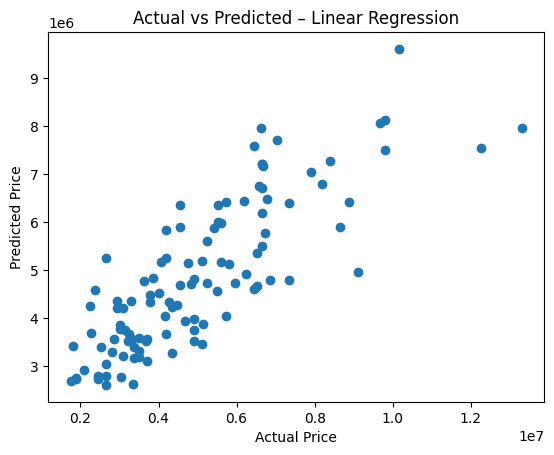

In [20]:
import matplotlib.pyplot as plt

y_pred_lr = lr.predict(X_test_scaled)

plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – Linear Regression")
plt.show()

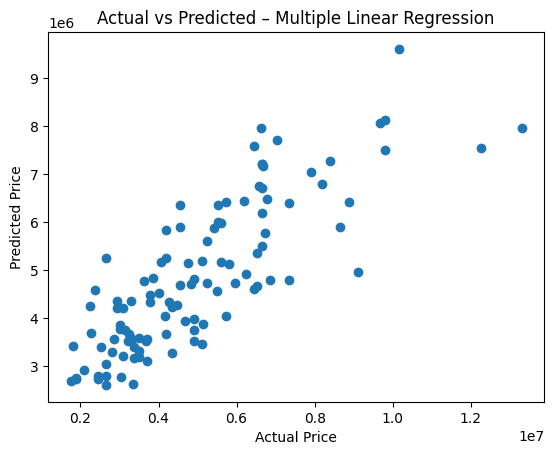

In [22]:
y_pred_mlr = mlr.predict(X_test_scaled)

plt.figure()
plt.scatter(y_test, y_pred_mlr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – Multiple Linear Regression")
plt.show()

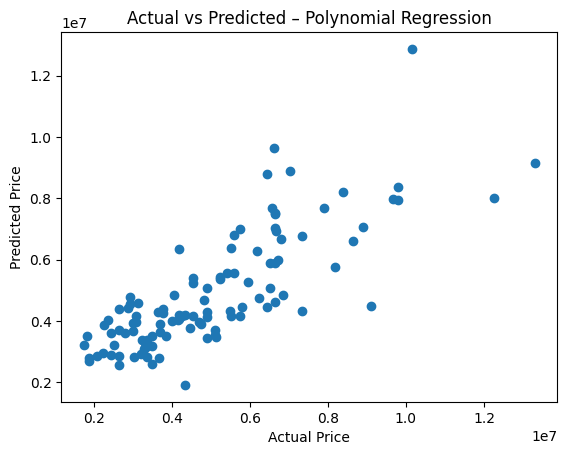

In [24]:
y_pred_poly = poly_model.predict(X_test_poly)

plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – Polynomial Regression")
plt.show()

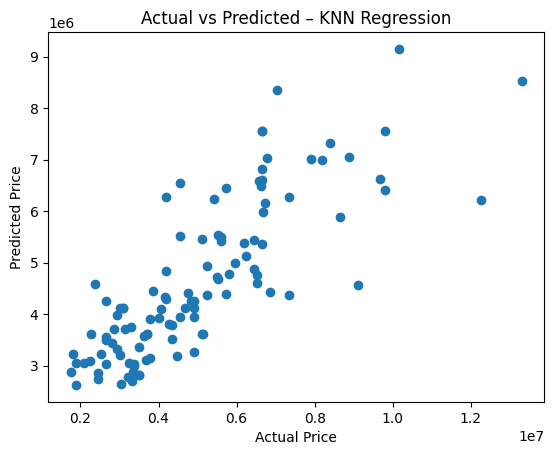

In [26]:
y_pred_knn = knn.predict(X_test_scaled)

plt.figure()
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – KNN Regression")
plt.show()

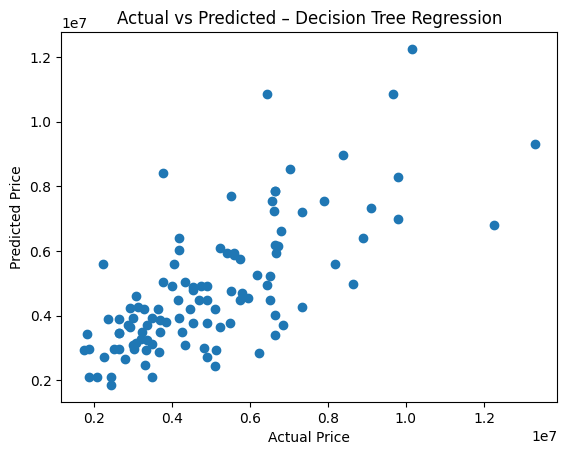

In [28]:
y_pred_dt = dt.predict(X_test)

plt.figure()
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted – Decision Tree Regression")
plt.show()

**Decision Tree Split Visualization**

This shows how the decision tree makes decisions.

Result
| Model                         | MAE       | RMSE      | R²    |
| ----------------------------- | --------- | --------- | ----- |
| Linear Regression             | 970,043   | 1,324,506 | 0.653 |
| Multiple Linear Regression    | 970,043   | 1,324,506 | 0.653 |
| Polynomial Regression (deg 2) | 1,034,749 | 1,379,016 | 0.624 |
| KNN Regression (k=5)          | 999,595   | 1,397,854 | 0.613 |
| Decision Tree Regression      | 1,195,266 | 1,625,669 | 0.477 |
Observation: Linear models gave the best accuracy on this dataset.Because it have low MAE,RMSE and high R2.

**Conclusion**

->Linear and Multiple Linear Regression models performed the best for this dataset.

->Polynomial Regression introduced non-linearity but did not improve overall accuracy.

->KNN is acceptable for smaller datasets but not the most efficient.

->Decision Tree overfitted the small dataset, resulting in lower R².

->Overall, Linear Regression is the most suitable model for predicting house prices in this scenario.

**Recommendation**

We Use- Linear Regression for doing house price prediction.

-The Linear Regression is best for my Dataset